In [1]:
import numpy as np
import os
import random
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 

# Train test split

In [3]:
img_folder = 'Q:/Personal/poze/ml_datra/sepia'

def split_files(folder_path, test_size = .2):
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    random.shuffle(files)
    
    train = files[:int(len(files) * (1- test_size))]
    test = files[int(len(files) * (1- test_size)):]
    
    return train, test

x_train_filenames, x_test_filenames = split_files(img_folder, test_size=.2)
    

# Filename -> image -> input

In [4]:
def load_images(filename_list, folder_path, size=(100, 100)):
    images = []
    for filename in filename_list:
        image = Image.open(
            os.path.join(folder_path, filename)
        )
        image = image.resize(size)
        image = image.convert('RGB')
        image_arr = np.array(image)
        images += [image_arr.flatten()]
        
    images_arr = np.array(images)
    return images_arr

x_train = load_images(x_train_filenames, img_folder)
y_train = ['sepia' in filename for filename in x_train_filenames]
x_test = load_images(x_test_filenames, img_folder)
y_test = ['sepia' in filename for filename in x_test_filenames]

# Normalise data

In [5]:
def normalisation(trainData, testData):
    scaler = StandardScaler()
        
    scaler.fit(trainData)
    normalisedTrainData = scaler.transform(trainData)  
    normalisedTestData = scaler.transform(testData) 
    
    return normalisedTrainData, normalisedTestData

x_train_norm, x_test_norm = normalisation(x_train, x_test)

# Ann classifier

In [20]:
class ANN:
    def __init__(self, 
                 input_size, 
                 hidden_size,
                 output_size,
                 learning_rate= .01,
                 epochs= 100,
                 print= True):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))
        self.print = print
        self.loss_list = []
        
    def fit(self, X, y):
        for epoch in range(self.epochs):
            z1 = np.dot(X, self.W1) + self.b1
            a1 = relu(z1)
            z2 = np.dot(a1, self.W2) + self.b2
            a2 = sigmoid(z2)
            
            loss = np.mean((y - a2) * (y - a2))
            self.loss_list += [loss]
            if self.print:
                print(f"Epoch {epoch}) -> Loss: {loss:.6f}")
            
            dz2 = (a2 - y) * sigmoid_deriv(a2)
            dW2 = np.dot(a1.T, dz2)
            db2 = np.sum(dz2, axis=0, keepdims=True)

            dz1 = np.dot(dz2, self.W2.T) * relu_deriv(a1)
            dW1 = np.dot(X.T, dz1)
            db1 = np.sum(dz1, axis=0, keepdims=True)

            self.W2 -= self.learning_rate * dW2
            self.b2 -= self.learning_rate * db2
            self.W1 -= self.learning_rate * dW1
            self.b1 -= self.learning_rate * db1
    
    def predict(self, X):
        z1 = np.dot(X, self.W1) + self.b1
        a1 = relu(z1)
        z2 = np.dot(a1, self.W2) + self.b2
        a2 = sigmoid(z2)
        return (a2 > 0.5).astype(int)

def relu(x):
    return np.maximum(0, x)

def relu_deriv(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return x * (1 - x)

# Train model

In [16]:
y_train = np.array(y_train).reshape(-1, 1)
classifier = ANN(input_size=30000, hidden_size=300, epochs=100, output_size=1, learning_rate= .001 )
classifier.fit(x_train_norm, y_train)

Epoch 0) -> Loss: 0.243624
Epoch 1) -> Loss: 0.202462
Epoch 2) -> Loss: 0.173994
Epoch 3) -> Loss: 0.149676
Epoch 4) -> Loss: 0.129664
Epoch 5) -> Loss: 0.114104
Epoch 6) -> Loss: 0.101883
Epoch 7) -> Loss: 0.092007
Epoch 8) -> Loss: 0.083866
Epoch 9) -> Loss: 0.077066
Epoch 10) -> Loss: 0.071313
Epoch 11) -> Loss: 0.066389
Epoch 12) -> Loss: 0.062640
Epoch 13) -> Loss: 0.060433
Epoch 14) -> Loss: 0.061049
Epoch 15) -> Loss: 0.064064
Epoch 16) -> Loss: 0.067235
Epoch 17) -> Loss: 0.060873
Epoch 18) -> Loss: 0.059916
Epoch 19) -> Loss: 0.054768
Epoch 20) -> Loss: 0.053418
Epoch 21) -> Loss: 0.049909
Epoch 22) -> Loss: 0.049786
Epoch 23) -> Loss: 0.046723
Epoch 24) -> Loss: 0.046879
Epoch 25) -> Loss: 0.044514
Epoch 26) -> Loss: 0.044397
Epoch 27) -> Loss: 0.041941
Epoch 28) -> Loss: 0.041705
Epoch 29) -> Loss: 0.038956
Epoch 30) -> Loss: 0.039417
Epoch 31) -> Loss: 0.037235
Epoch 32) -> Loss: 0.037391
Epoch 33) -> Loss: 0.035310
Epoch 34) -> Loss: 0.035852
Epoch 35) -> Loss: 0.033937
Ep

# Test model

In [17]:
y_predict = classifier.predict(x_test)

# Metrics

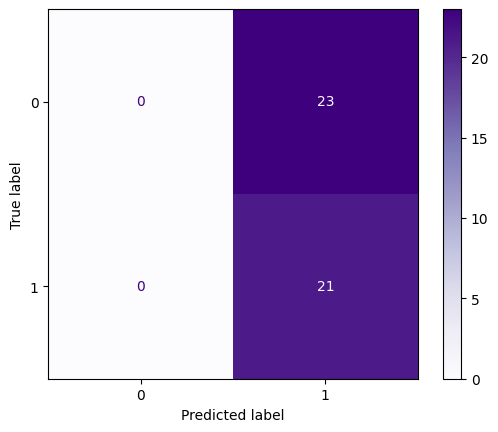

              precision    recall  f1-score   support

       False       0.00      0.00      0.00        23
        True       0.48      1.00      0.65        21

    accuracy                           0.48        44
   macro avg       0.24      0.50      0.32        44
weighted avg       0.23      0.48      0.31        44


Q:\info\Python\lab7\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
Q:\info\Python\lab7\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
Q:\info\Python\lab7\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix(
        y_test, y_predict
    )
).plot(cmap=plt.cm.Purples)
plt.show()

print(classification_report(y_test, y_predict))

# Influenta parametrilor

## Learning rate

C:\Users\Alex\AppData\Local\Temp\ipykernel_21032\3466512245.py:57: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


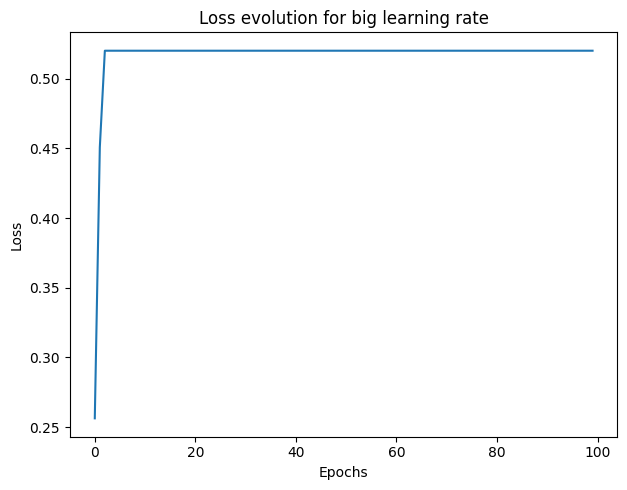

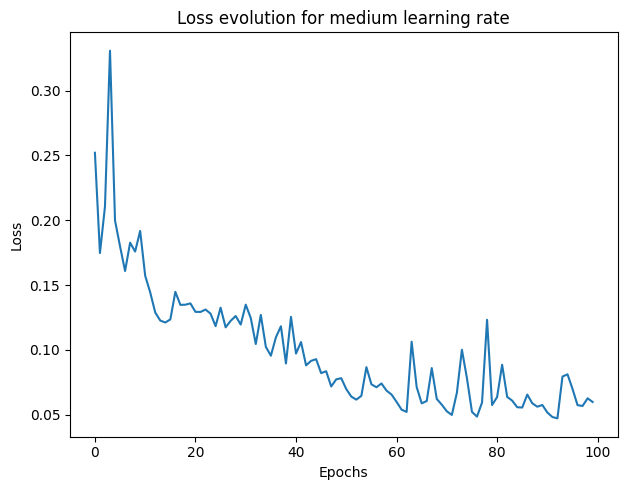

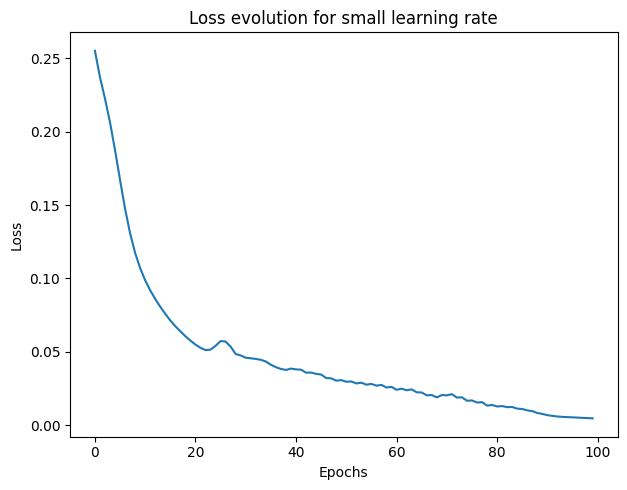

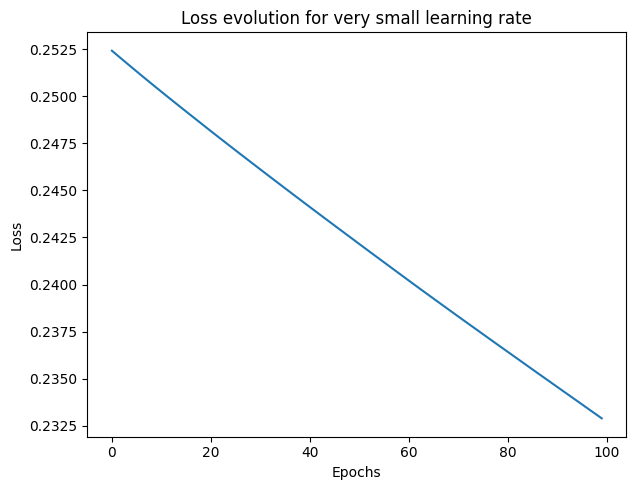

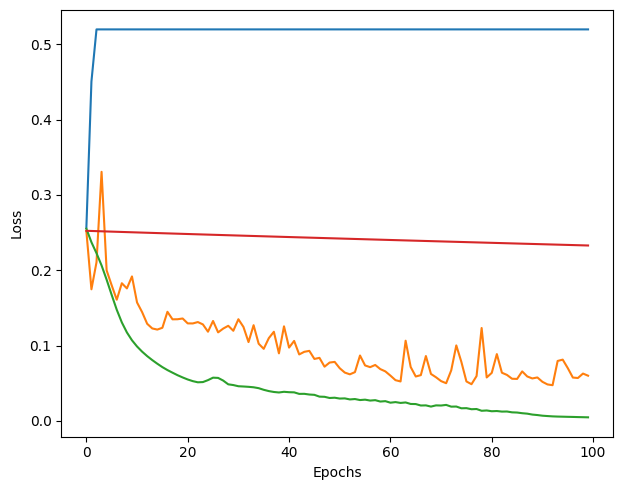

In [28]:
big_lr_ann = ANN(hidden_size= 100, input_size= 30000, output_size= 1, learning_rate= .1, epochs= 100, print= False)
medium_lr_ann = ANN(hidden_size= 100, input_size= 30000, output_size= 1, learning_rate= .01, epochs= 100, print= False)
small_lr_ann = ANN(hidden_size= 100, input_size= 30000, output_size= 1, learning_rate= .001, epochs= 100, print= False)
very_small_lr_ann = ANN(hidden_size= 100, input_size= 30000, output_size= 1, learning_rate= .00001, epochs= 100, print= False)

big_lr_ann.fit(x_train_norm, y_train)
medium_lr_ann.fit(x_train_norm, y_train)
small_lr_ann.fit(x_train_norm, y_train)
very_small_lr_ann.fit(x_train_norm, y_train)

def plot_loss_history(title, history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history, label='Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    
    plt.tight_layout()
    plt.show()
    
plot_loss_history('Loss evolution for big learning rate', big_lr_ann.loss_list)
plot_loss_history('Loss evolution for medium learning rate', medium_lr_ann.loss_list)
plot_loss_history('Loss evolution for small learning rate', small_lr_ann.loss_list)
plot_loss_history('Loss evolution for very small learning rate', very_small_lr_ann.loss_list)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(big_lr_ann.loss_list, label="big lr")
plt.plot(medium_lr_ann.loss_list, label="medium lr")
plt.plot(small_lr_ann.loss_list, label="small lr")
plt.plot(very_small_lr_ann.loss_list, label="very small lr")
plt.xlabel('Epochs')
plt.ylabel('Loss')
    
plt.tight_layout()
plt.show()

## Hidden layer size

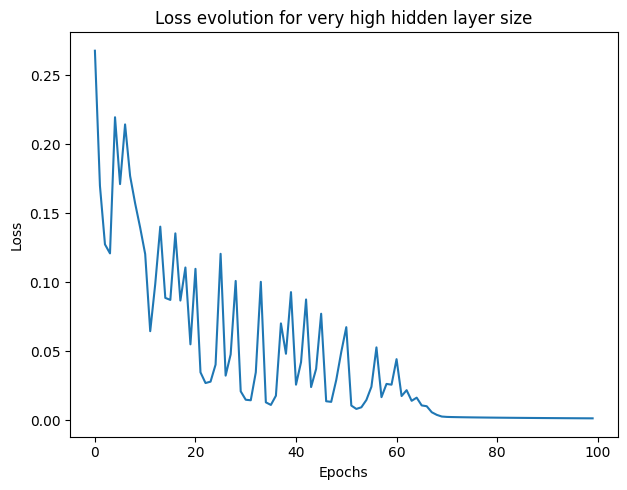

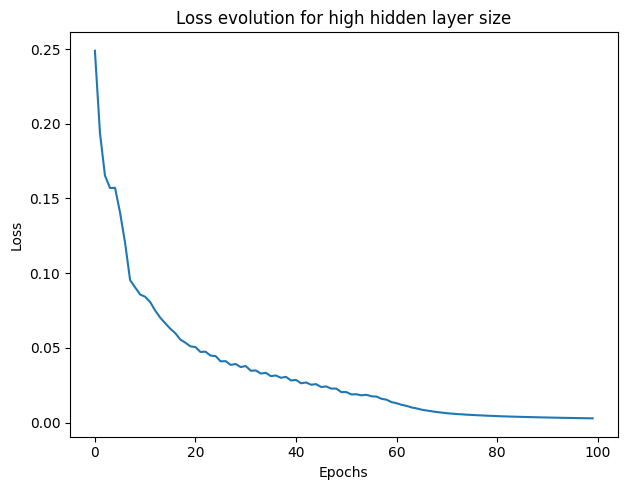

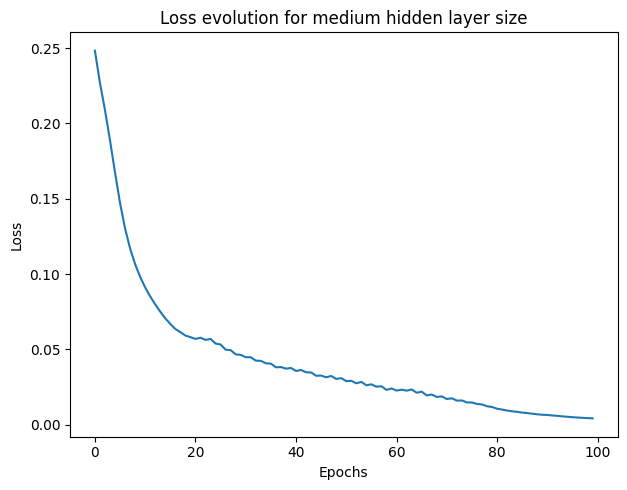

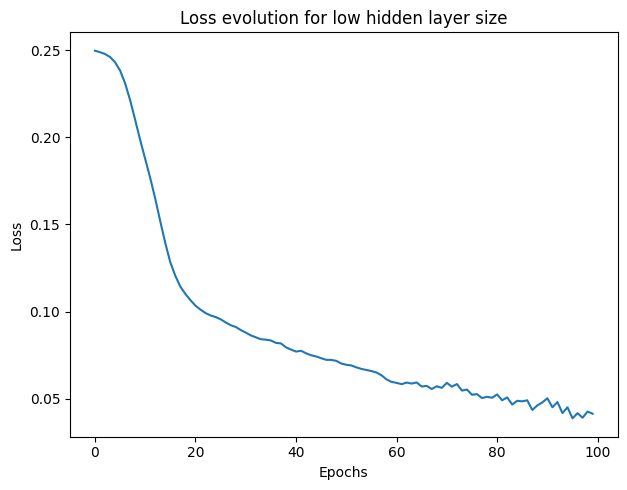

In [25]:
very_high_hidden_layer_ann = ANN(hidden_size= 2000, input_size= 30000, output_size= 1, learning_rate= .001, epochs= 100, print= False)
high_hidden_layer_ann = ANN(hidden_size= 500, input_size= 30000, output_size= 1, learning_rate= .001, epochs= 100, print= False)
medium_hidden_layer_ann = ANN(hidden_size= 100, input_size= 30000, output_size= 1, learning_rate= .001, epochs= 100, print= False)
low_hidden_layer_ann = ANN(hidden_size= 5, input_size= 30000, output_size= 1, learning_rate= .001, epochs= 100, print= False)

very_high_hidden_layer_ann.fit(x_train_norm, y_train)
high_hidden_layer_ann.fit(x_train_norm, y_train)
medium_hidden_layer_ann.fit(x_train_norm, y_train)
low_hidden_layer_ann.fit(x_train_norm, y_train)

def plot_loss_history(title, history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history, label='Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    
    plt.tight_layout()
    plt.show()

plot_loss_history('Loss evolution for very high hidden layer size', very_high_hidden_layer_ann.loss_list)
plot_loss_history('Loss evolution for high hidden layer size', high_hidden_layer_ann.loss_list)
plot_loss_history('Loss evolution for medium hidden layer size', medium_hidden_layer_ann.loss_list)
plot_loss_history('Loss evolution for low hidden layer size', low_hidden_layer_ann.loss_list)
